In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import demoji
import spacy

import plotly.graph_objects as go
from PIL import ImageColor, Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px


In [2]:
# colormaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 
#              'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
#              'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
#              'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
#              'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
#              'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 
#              'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
#              'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
#              'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
#              'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
#              'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
#              'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
#              'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
#              'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
#              'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 
#              'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
#              'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
#              'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
#              'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
#              'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
#              'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 
#              'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 
#              'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
#              'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
#              'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
#              'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 
#              'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
#              'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Load DataSet and Data Dictionary

In [3]:
# main_dir = 
Dataset_name = 'TechLabsDataset.csv' 
DataDictionary_name = 'TechLabsDataset_Dictionary.csv'

Dataset = pd.read_csv(os.path.join('./Data/',Dataset_name), index_col = 0)
DataDictionary = pd.read_csv(os.path.join('./Data/',DataDictionary_name), index_col = 0)
Dataset.head()

,name,type_company,website,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
0,Caretrex warehousing & logistics,Logistics service,http://www.caretrex.com/,51.593721,5.073492,Tilburg,5.0,2.0,HHpDM,0.0,4.0,2 years ago,2022-09-24,5.0,NaN,NaN
1,Caretrex warehousing & logistics,Logistics service,http://www.caretrex.com/,51.593721,5.073492,Tilburg,5.0,2.0,dYFWx,0.0,1.0,5 years ago,2022-09-24,5.0,NaN,NaN
2,FEFA Logistics,Trucking company,http://www.fefalogistics.nl/,51.480074,5.446764,Eindhoven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dekkers Transport Holland,Trucking company,http://www.dekkerstransport.nl/,51.597249,5.027990,Tilburg,4.6,53.0,Pp1)c,0.0,5.0,a year ago,2022-09-24,5.0,Best employer ever. Worked there for approxima...,ENG
4,Dekkers Transport Holland,Trucking company,http://www.dekkerstransport.nl/,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG


In [4]:
review_df = pd.DataFrame(Dataset[~Dataset['review_EN'].isnull()]['review_EN'])
review_df.head()


,review_EN
3,Best employer ever. Worked there for approxima...
4,better place with very good people everything ...
5,Nice
6,Good firm. The staff are very welcoming and f...
7,"Top company, and coffee, so recommended\n\n"


In [5]:
# find emo
def find_emo(text):
    # find emoji and add to list
    all_emoji = demoji.findall(text)
    emo = ''
    if len(all_emoji)>0:
        for i,j in enumerate(all_emoji):
            # list emo
            emo = emo+','+all_emoji[j]
    return emo


# replace emo with empty text
def replace_emo(text):
    # find emo and replce with empty text
    all_emoji = demoji.findall(text)

    if len(all_emoji)>0:
        for i,j in enumerate(all_emoji):
            text = text.replace(j,'')
    return text

In [6]:
# add emo
review_df['emo'] = review_df['review_EN'].apply(lambda x: find_emo(x))

In [7]:
review_df.head()

,review_EN,emo
3,Best employer ever. Worked there for approxima...,
4,better place with very good people everything ...,
5,Nice,
6,Good firm. The staff are very welcoming and f...,
7,"Top company, and coffee, so recommended\n\n",


In [8]:
# add review with no emo
review_df['review_no_emo'] = review_df['review_EN'].apply(lambda x: replace_emo(x))
# review_df[review_df['emo']!=''][['review_no_emo','emo']]

In [9]:
review_df.head()

,review_EN,emo,review_no_emo
3,Best employer ever. Worked there for approxima...,,Best employer ever. Worked there for approxima...
4,better place with very good people everything ...,,better place with very good people everything ...
5,Nice,,Nice
6,Good firm. The staff are very welcoming and f...,,Good firm. The staff are very welcoming and f...
7,"Top company, and coffee, so recommended\n\n",,"Top company, and coffee, so recommended\n\n"


# NLP pre-processing on review_df['review_no_emo']


In [10]:
# get clean lemmas
def get_clean_lemma(text):  
    text = [token.lemma_ for token in nlp(text.lower()) if
                  not token.is_punct
                  and not token.is_currency
                  and not token.is_digit
                  and not token.is_punct
    #               and not token.is_oov# is out of vocabulary
                  and not token.is_space
                  and not token.is_stop
                  and not token.like_num
                  and not token.pos_ in ['SYM','SPACE',#'ADJ',
                                         'SCONJ','PUNCT', 'X', 'ADP',
                                         'AUX','CCONJ','DET','INTJ',
                                         'NUM','PART','PRON']
                          ]
    return text




In [11]:

# check attribute of token in spacy: https://spacy.io/api/token

# list of stop words in spacy
# spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
# print('Number of stop words: %d' % len(spacy_stopwords))
# print('First ten stop words: %s' % list(spacy_stopwords))

nlp = spacy.load("en_core_web_sm")

review_df['text_lemmas'] = review_df['review_no_emo'].apply(lambda x: get_clean_lemma(x))


In [12]:
review_df.head()

,review_EN,emo,review_no_emo,text_lemmas
3,Best employer ever. Worked there for approxima...,,Best employer ever. Worked there for approxima...,"[good, employer, work, approximately, year, ti..."
4,better place with very good people everything ...,,better place with very good people everything ...,"[well, place, good, people, perfect]"
5,Nice,,Nice,[nice]
6,Good firm. The staff are very welcoming and f...,,Good firm. The staff are very welcoming and f...,"[good, firm, staff, welcoming, friendly, thank..."
7,"Top company, and coffee, so recommended\n\n",,"Top company, and coffee, so recommended\n\n","[company, coffee, recommend]"


In [13]:

concatenate_all_tokens = sum(review_df['text_lemmas'].tolist(),[])
from collections import Counter


word_counts = Counter(concatenate_all_tokens)


In [14]:
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df.columns = ['word','#']
word_counts_df.sort_values('#',ascending = False, inplace = True)


In [15]:
word_counts_df

,word,#
32,company,769
0,good,582
5,time,529
93,delivery,482
70,driver,430
...,...,...
2123,portable,1
2120,cycle,1
2118,requirement,1
2113,transportcompany,1


In [16]:
word_counts_df['tag'] = word_counts_df['word'].apply(lambda x: nlp(x)[0].pos_)

In [17]:
word_counts_df = word_counts_df[~word_counts_df['tag'].isin(['SYM','SPACE','ADJ',
                                         'SCONJ','PUNCT', 'X', 'ADP',
                                         'AUX','CCONJ','DET','INTJ',
                                         'NUM','PART','PRON','PROPN'])]



/var/folders/6d/dgjgypyn24x1lv9vc5gs38p00000gp/T/ipykernel_97057/579942042.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = word_counts_df['#'], bins = 200,ax = ax[1])


(0.0, 200.0)

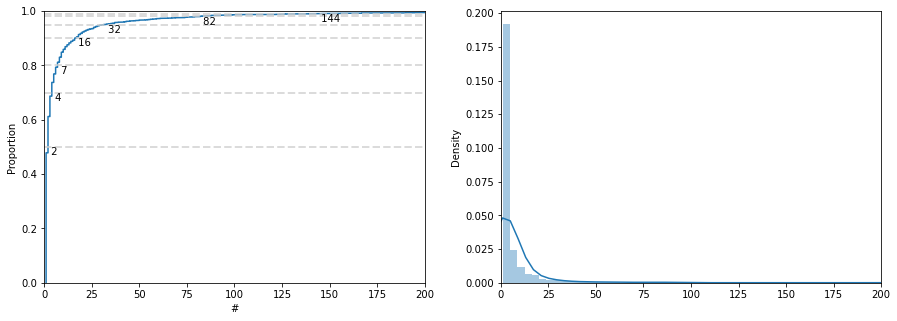

In [18]:
fig,ax = plt.subplots(1,2, figsize = (15,5))
sns.ecdfplot(data = word_counts_df,x = '#',ax = ax[0])

for line in ax[0].get_lines():
        
    for y_special in [0.5, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99]:
        x, y = line.get_data()
        ind = np.argwhere(y >= y_special)[0, 0]  # first index where y is larger than y_special
        # x[ind] is the desired x-value
        ax[0].text(x[ind], y_special, f' {x[ind]:.0f}', ha='left', va='top') # maybe color=line.get_color()
        ax[0].axhline(y_special, linestyle='--', color='#cfcfcf', lw=2, alpha=0.75)
ax[0].set_xlim([0,200])

sns.distplot(x = word_counts_df['#'], bins = 200,ax = ax[1])
ax[1].set_xlim([0,200])

# ax[0].axline((0, 0.5), slope=0, color='r')
# ax[0].axline((0, 0.8), slope=0, color='r')
# ax[0].axline((10, 0), slope=90, color='r')
# ax[0].axline((20, 0), slope=90, color='r')

In [19]:
print(np.unique(word_counts_df['tag']))


['ADV' 'NOUN' 'VERB']


In [20]:
freq_thr = int(x[ind])
most_freq_df = pd.DataFrame([])

for i in np.unique(word_counts_df['tag']):
    most_freq_df = pd.concat([most_freq_df,
                               word_counts_df[(word_counts_df['tag']==i) & (word_counts_df['#']>=freq_thr)]],
                             axis = 0)


In [21]:
most_freq_df.shape

(26, 3)

In [22]:

remove =['spreuwel','mediamarkt','hornbach','netherlands','english',
         'nl','eindhoven','germany','deliverer','quantum','ea','logistic',
         'company','pm','p.m.','am','a.m.','work','super','thank']
most_freq_df = most_freq_df[~most_freq_df['word'].isin(remove)]
most_freq_df.loc[most_freq_df['word']=='cmr','tag'] = 'NOUN'

In [23]:
most_freq_df.loc[most_freq_df['word']=='cmr']

,word,#,tag


In [24]:
most_freq_df['tag'].value_counts().sum()

23

In [25]:
# aggregate words having same count
agg_words_df = pd.DataFrame([])
for i in np.unique(most_freq_df['tag']):
    aggre_df = pd.DataFrame(most_freq_df[most_freq_df['tag']==i].groupby('#')['word'].apply(list))
    aggre_df['#'] = np.unique(most_freq_df[most_freq_df['tag']==i]['#'])
    aggre_df['tag'] = i
    agg_words_df = pd.concat([agg_words_df,aggre_df], axis= 0)
agg_words_df['word_list'] = agg_words_df['word'].apply(lambda x: ', '.join(map(str,x)))
agg_words_df['tag'].value_counts() 

NOUN    14
VERB     6
ADV      3
Name: tag, dtype: int64

In [26]:
agg_words_df

,word,#,tag,word_list
#,,,,
152,[long],152,ADV,long
197,[quickly],197,ADV,quickly
378,[fast],378,ADV,fast
144,[toilet],144,NOUN,toilet
156,[coffee],156,NOUN,coffee
163,[place],163,NOUN,place
167,[office],167,NOUN,office
189,[transport],189,NOUN,transport
190,[order],190,NOUN,order


In [27]:
# https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/

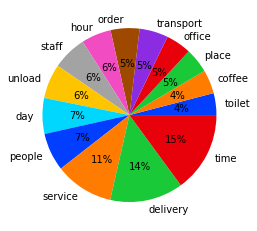

In [28]:
# define Seaborn color palette to use
data = agg_words_df[agg_words_df['tag']=='NOUN']['#'].tolist()
keys = agg_words_df[agg_words_df['tag']=='NOUN']['word_list'].tolist()


palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

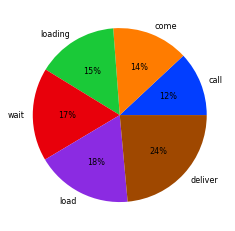

In [29]:
# define Seaborn color palette to use
data = agg_words_df[agg_words_df['tag']=='VERB']['#'].tolist()
keys = agg_words_df[agg_words_df['tag']=='VERB']['word_list'].tolist()


palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%',textprops={'fontsize': 8})
  
# displaying chart
plt.show()

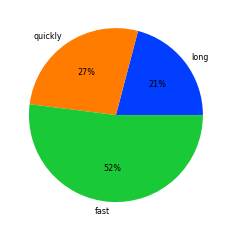

In [30]:
# define Seaborn color palette to use
data = agg_words_df[agg_words_df['tag']=='ADV']['#'].tolist()
keys = agg_words_df[agg_words_df['tag']=='ADV']['word_list'].tolist()


palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%',textprops={'fontsize': 8})
  
# displaying chart
plt.show()

/Users/giu/opt/anaconda3/envs/TOMlogistics/lib/python3.9/site-packages/seaborn/categorical.py:3202: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


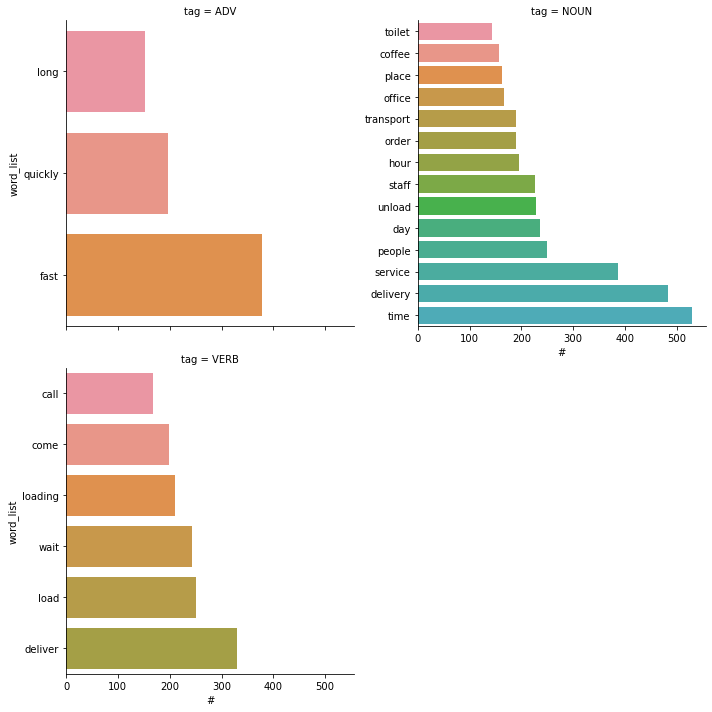

In [31]:
sns.catplot(
    data=agg_words_df, y="word_list", x="#", col="tag",col_wrap=2,
    kind="bar",sharey=False
)

(-0.5, 399.5, 199.5, -0.5)

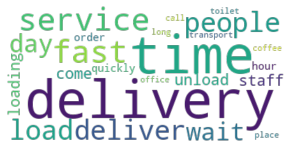

In [32]:
most_freq_df.head()
freq_dict={}
N_words = most_freq_df.shape[0]
for i in np.arange(N_words):
    freq_dict[most_freq_df['word'].iloc[i]]=most_freq_df['#'].iloc[i]
    
wc_img = WordCloud(background_color=None,#collocation_threshold=80,mask=wave_mask,
               contour_color='white',max_words=N_words,min_word_length=3,
               mode ="RGBA",collocations=False,repeat=True)#max_font_size = 40,
#print(txt_to_use.tolist())
wc_img = wc_img.generate_from_frequencies(frequencies=freq_dict)

fig,ax =plt.subplots(figsize=(5,8))
ax.imshow(wc_img, interpolation='bilinear')
ax.axis("off")

In [33]:
def get_rgb_color_list(color_palette,n_colors):
    """
        generate a list of rgb color from color_palette
    
    
    inputs: color_palette,string e.g.'Grays'
            n_colors,integer indicating how many colors should be generates
    
    outputs:
            color_list_rgb,list containing color stings e.g. [(255,255,129),(243,198,244),..]
            """
    color_list = sns.color_palette(palette=color_palette, n_colors=n_colors)
    color_list=color_list.as_hex()
    color_list_rgb =list()
    for h in color_list:
        color_list_rgb.append(ImageColor.getcolor(h, "RGB"))
    #color_list_rgb.append([(0,0,0)])
    return color_list_rgb

def change_image_color(wave_mask,color_rgb,opacity):
    """
        filter colors in image mask and change opacity
    
    
    inputs: wave_mask,matrix (n,m,4)containing colors in rgba
            color_rgb,color in rgb e.g.(0,0,0)
            pltsize,[width,height] e.g.[400,600] 
            opacity,float between 0 and 1
    outputs:
            wave_mask,matrix (n,m,4)containing colors in rgba of the image mask
            """
    red,green,blue,alpha=wave_mask.T
    white_areas=(red>128)&(blue>128)&(green>128)
    wave_mask[...,:][white_areas.T]=(255,255,255,255)
    red,green,blue,alpha=wave_mask.T
    white_areas=(red<128)&(blue<128)&(green<128)
    wave_mask[...,:][white_areas.T]=color_rgb+(int(225*opacity),)
    return wave_mask

def plot_wordscloud(image_path,tags,color_mask,pltsize,opacity,colormap_text):
    """
        generate wordscloud visualization compatible with plotly
    
    
    inputs:
            image_path, string indicating the path of the image mask to load
            tags, dataframe with 'word' and count'#'
            color_mask,rgb e.g.(0,0,0)
            pltsize,[width,height] e.g.[400,600] 
            opacity,float between 0 and 1
    outputs:
            wc_img,image of wordscloud not suitable for plotly -to be used for verification
            fig, figure handle suitable for plotly
            wave_mask,matrix (n,m,4)containing colors in rgba of the image mask
            """

    
    # generate a mask with the input picture
    wave_mask = np.array(Image.open(image_path).convert('RGBA'))

    #wave_mask=np.insert(wave_mask,1,opacity*np.ones((wave_mask.shape[0],wave_mask.shape[1])),2)
    wave_mask=change_image_color(wave_mask,color_mask,opacity)
    freq_dict={}
    N_words = tags.shape[0]
    for i in np.arange(N_words):
        freq_dict[tags['word'].iloc[i]]=tags['#'].iloc[i]

    
    
    #generate wordcloud from package
    
    wc_img = WordCloud(mask=wave_mask,background_color=None,#collocation_threshold=80,
                   contour_color='black',max_words=N_words,#min_word_length=3,
                   mode ="RGBA",repeat=False,colormap = colormap_text)#,max_font_size = 80)#max_font_size = 40,
    #print(txt_to_use.tolist())
    wc_img = wc_img.generate_from_frequencies(frequencies=freq_dict)
    
    
#    fig,ax =plt.subplots(figsize=(5,8))
#    ax.imshow(wc_img, interpolation='bilinear')
#    ax.axis("off")

    # string, font size, position, orientation and color.
    # get wc layout
    var_str =[wc_img.layout_[i][0][0] for i in np.arange(len(wc_img.layout_))]#string

    var_freq =[wc_img.layout_[i][0][1] for i in np.arange(len(wc_img.layout_))]#frequency
    var_size =[wc_img.layout_[i][1] for i in np.arange(len(wc_img.layout_))]#size
    var_position =np.asarray([[wc_img.layout_[i][2][0],wc_img.layout_[i][2][1]] for i in np.arange(len(wc_img.layout_))])#position
    var_position[:,0]=var_position[:,0]#-0.2*var_position[:,0]#-0.8*np.mean(var_position[:,0])
    var_position[:,1]=var_position[:,1]#-0.2*var_position[:,1]#-0.8*np.mean(var_position[:,1])
    var_oriet =[wc_img.layout_[i][3] for i in np.arange(len(wc_img.layout_))]#orientation
    var_color =[wc_img.layout_[i][4] for i in np.arange(len(wc_img.layout_))]#color
    
    all_wc=pd.DataFrame([var_str,var_freq,var_size,var_position[:,0],var_position[:,1],var_oriet,var_color]).T
    all_wc.columns=['var_str','var_freq','var_size','var_x','var_y','var_oriet','var_color']
    
    # split words per orienation
    idx_or1= np.where(np.asarray(var_oriet)==2)[0]# vertical words
    idx_or2= np.where(np.asarray(var_oriet)==None)[0]#orizontal words


    layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
    #generate wordcloud compatible with plotly
    
    fig = go.Figure(layout = layout,data =px.imshow(wave_mask))#, 
    fig.update_traces(hoverinfo='none', hovertemplate='')
    #add annotation of vertical text
    for i in idx_or1:
        fig.add_annotation(y=np.asarray(var_position)[i,0],
             x=np.asarray(var_position)[i,1],
             text=np.asarray(var_str)[i],
             textangle=90,
             showarrow=False,
             xanchor="left",
             yanchor="top",
             #clicktoshow='onout',
             #captureevents=True,
             hovertext='# '+str(tags['#'].loc[tags['word']==np.asarray(var_str)[i]].values[0]),
                           font=dict(
                    color=np.asarray(var_color)[i],
                    size=np.asarray(var_size)[i]+5,
                    family='Droid Sans Mono',
                    
                ))
    #add annotation of horizontal text
    for i in idx_or2:    
        #print(np.asarray(var_str)[i])
        fig.add_annotation(y=np.asarray(var_position)[i,0],
             x=np.asarray(var_position)[i,1],
             text=np.asarray(var_str)[i],
             textangle=0,
             showarrow=False,
             xanchor="left",
             yanchor="top",
             hovertext='# '+str(tags['#'].loc[tags['word']==np.asarray(var_str)[i]].values[0]),
             font=dict(
                    color=np.asarray(var_color)[i],
                    size=np.asarray(var_size)[i]+5,
                    family='Droid Sans Mono'
                ))
    
#     fig.update_traces(textposition='inside')
    fig.update_yaxes(autorange="reversed")
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(
        paper_bgcolor='rgb(255,255,255)',
        plot_bgcolor='rgb(255,255,255)', 
        width=pltsize[0],
        height=pltsize[1],
        margin=dict(l=1, r=1, t=1, b=1)
        )
    fig.update_layout(clickmode='select')

    
    return(wc_img,fig,wave_mask)



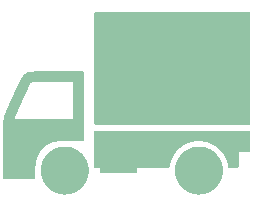

In [35]:
image_path = './figures/truck.png'
pltsize = [500,500]
opacity = 0.5
color_list_rgb_list = get_rgb_color_list('Greens',5)
color_mask = color_list_rgb_list[4]
# tags = most_freq_df[most_freq_df['tag']=='ADV']
colormap_text = 'Greys_r'
wc_img,fig,wave_mask = plot_wordscloud(image_path,most_freq_df,color_mask,pltsize,opacity, colormap_text)
fig
fig.show()
#    fig,ax =plt.subplots(figsize=(5,8))
#    ax.imshow(wc_img, interpolation='bilinear')
#    ax.axis("off")



In [36]:
lexicon = most_freq_df['word'].tolist()
len_lex = len(lexicon)
print(np.unique(most_freq_df['tag']))

['ADV' 'NOUN' 'VERB']


In [37]:
# add color to tags
col_tags = get_rgb_color_list('BuGn',len(np.unique(most_freq_df['tag'])))
col_tags  = ['blue','red','yellow','green']
col_tags = ['#d6cbd3','#eca1a6','#feb236','#ada397']

dict_col = {}
for j,i in enumerate(np.unique(most_freq_df['tag'])):
    dict_col[i] = col_tags[j]


In [38]:
# add color tag to the lexicon
most_freq_df['col_tag'] = most_freq_df['tag'].apply(lambda x: dict_col[x])
most_freq_df.head()

,word,#,tag,col_tag
92,fast,378,ADV,#d6cbd3
54,quickly,197,ADV,#d6cbd3
47,long,152,ADV,#d6cbd3
5,time,529,NOUN,#eca1a6
93,delivery,482,NOUN,#eca1a6


In [39]:
print(lexicon)
# make adjacency matrix
lexicon_adjmat = np.zeros((len_lex,len_lex))
lexicon_adjmat = pd.DataFrame(lexicon_adjmat,columns = lexicon, index = lexicon)
for i in np.arange(review_df['text_lemmas'].shape[0]):
    intersec = list(set(review_df['text_lemmas'].iloc[i]).intersection(set(lexicon)))
    lexicon_adjmat.loc[intersec,intersec] = lexicon_adjmat.loc[intersec,intersec]+ 1

['fast', 'quickly', 'long', 'time', 'delivery', 'service', 'people', 'day', 'unload', 'staff', 'hour', 'order', 'transport', 'office', 'place', 'coffee', 'toilet', 'deliver', 'load', 'wait', 'loading', 'come', 'call']


In [40]:
color_discrete_map = {}
for i in np.arange(most_freq_df.shape[0]):
    color_discrete_map[most_freq_df['word'].iloc[i]] = most_freq_df['col_tag'].iloc[i]

In [41]:
import plotly.graph_objects as go
import networkx as nx
import plotly.express as px
from plotly.offline import plot

# pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G)

# G = nx.DiGraph(ad_mat)
# nx.draw(G)

# for i in np.arange(most_freq_df.shape[0]):
#     G.nodes(data = True)[i]['level'] = most_freq_df['col_tag'].iloc[i]
# pos = nx.multipartite_layout(G, subset_key="level")

def sigmoid(x):
    y = 10 / (1 + np.exp(-(x-5)/1.9))
    return y

/var/folders/6d/dgjgypyn24x1lv9vc5gs38p00000gp/T/ipykernel_97057/805009564.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

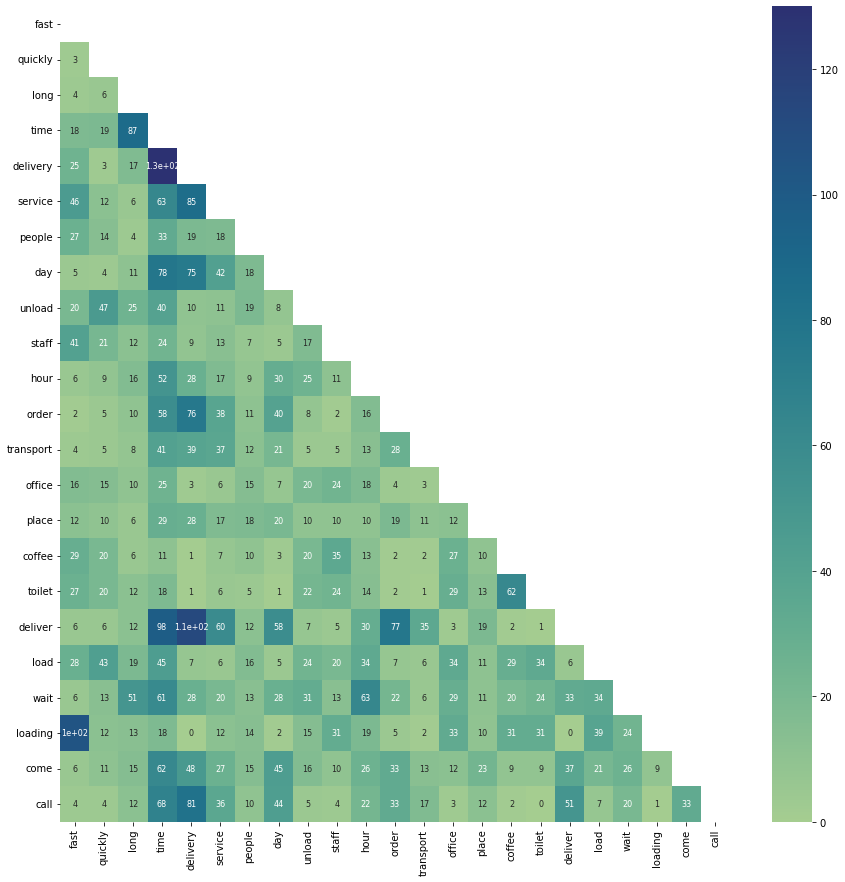

In [42]:
fig,ax = plt.subplots(figsize = (15,15))
# matrix = np.triu(lexicon_adjmat.values)
mask = np.zeros_like(lexicon_adjmat.values, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(lexicon_adjmat,mask=mask, annot=True, ax = ax, cmap="crest",annot_kws={"fontsize":8})

In [75]:
ad_mat = lexicon_adjmat.values
G = nx.from_numpy_matrix(ad_mat)
pos = nx.random_layout(G)
pos = nx.kamada_kawai_layout(G)

In [79]:
    
edge_x = []
edge_y = []
weight=[]
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
#     print(G.get_edge_data(edge[0],edge[1])['weight'])
    weight.append(G.get_edge_data(edge[0],edge[1])['weight'])
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    
# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color='#888'),
#     hoverinfo='none',
#     mode='lines')

# s_w=np.round(sigmoid(np.asarray(weight)),1).tolist()
# s_w=np.round(np.log(weight))
s_w = np.asarray(weight)/100
#color_list = get_rgb_color_list('BuGn',len(weight))

middle_node_trace = go.Scatter(
    x=list(),
    y=list(),
    text=list(),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        opacity=0
    ),
    hoverlabel= dict(bgcolor= '#FFFFFF')
)

edge_trace=list()
n=0
m=3
for i in np.arange(len(weight)):
    edge_trace.append(go.Scatter(x = edge_x[n:m], 
                               y = edge_y[n:m],
                               hoverinfo='none',
                               hovertext =' ',
                               line=dict(
                            color='rgb(100,200,'+str(int(s_w[i]))+')',
                            width=s_w[i])
                            #width=int(weight[i]))#int(s_w[i]))
                            ))
    middle_node_trace['x']+=((edge_x[n]+edge_x[n+1])/2,0)
    middle_node_trace['y']+=((edge_y[n]+edge_y[n+1])/2,0)
    middle_node_trace['text']+=(str(int(weight[i])),0)#+' visits',0)
    n=m
    m=m+3

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
size_points=pd.DataFrame([node_x,node_y,np.diag(ad_mat)]).T
size_points.columns=['x','y','#']
size_points['lexicon']= lexicon
size_points = size_points.merge(most_freq_df[['word','tag']], left_on='lexicon', right_on='word')
size_points.drop('word',axis = 1,inplace = True)

for t in np.arange(len(np.unique(size_points['tag']))):
    edge_trace.append(px.scatter(size_points,
                                     x='x',y='y',
                                     size="#",
                                     text='lexicon',
                                     color = 'tag',
        #                              color_discrete_map=color_discrete_map,
                                     hover_data= {
                                    "x": False,   
                                    "y": False,
                                    "#": True,
                                    "lexicon": False,
                                    "tag": False,
                                    }
                                ).update_traces(mode='markers+text').data[t])

edge_trace.append(middle_node_trace)   



fig=go.Figure(data=edge_trace)
fig.update_layout(width=1000,height=1000,
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)) 
fig.update_layout(showlegend=False,
        paper_bgcolor='rgb(255,255,255)',
        plot_bgcolor='rgb(255,255,255)',
        font=dict(
        #family="Courier New, monospace",
        size=16,
        color="RebeccaPurple"
    ))
fig.for_each_trace(lambda t: t.update(textposition='top center'))
fig.update_layout(font_family="Calibri",width=1000,height=1000)

fig.update_layout(
    margin=dict(l=0, r=0, t=20, b=0))
fig.show()

# plot(fig,config=dict(
#                     displayModeBar=False
#                 ))